# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm

****
</div>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [13]:
mean = 98.6

#### Part 1:  Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

In [8]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


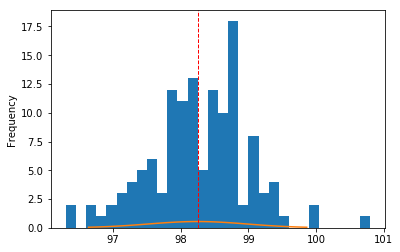

In [143]:
df.temperature.plot.hist(bins=30)

mean = df.temperature.mean()
std = df.temperature.std()
var = df.temperature.var()

x = np.linspace(mean-3*var, mean+3*var, 100)
plt.plot(x, mlab.normpdf(x,mean,std))
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)

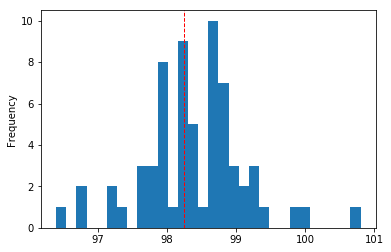

In [144]:
# female subjects
fp = df.temperature[df.gender == "F"].plot.hist(bins=30)
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)

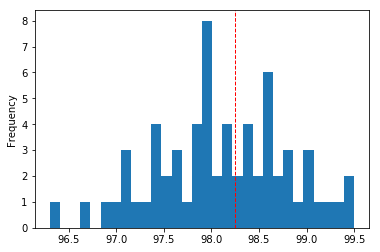

In [145]:
#male subjects 
mp = df.temperature[df.gender == "M"].plot.hist(bins=30)
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)

#### Answer
No, the sample does not have a normal distribution. The first  histogram above shows that the distribution is skewed, with a few subjects showing body temperatures well above 3 standard deviations above the mean. Subsequent historgrams of body temperature for men and women separately show that the females are driving the temperatures  above the average, while the males samples have the lowest temperatures. Whether this different is statistically signficant will be determined below.

#### Part 2: Is the sample size large? Are the observations independent?
 - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
 
#### Answer: 
With 130 samples, the sample size is sufficiently large. According to the CLT, a sample size of at least 50 observations is sufficiently large.
Each sample is a unique individual and therefore independent; the temperature of one subject is independent of the temperature of the other subjects. 

In [7]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


#### Part 1: Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  tt  or  zz  statistic?
- Now try using the other test. How is the result be different? Why?

#### Answer
- The null hypothesis = the mean body temperature is 98.6 degrees F. 
- The alternative hypothesis = the mean body temperature is NOT equal to 98.6 F.

We want to know whether the actual mean population is not equal to 98.6 -- above or below the reported mean of 98.6. Therefore, we should use a two-sample test. Given this sample set contains 130 samples, the sample size is sufficiently large. It is therefore appropriate to use a z-test (t-test should be used for small sample sets).

--> While the sample mean is not equal to the reported population mean of 98.6 degrees F, we cannot reject the null hypothesis that the population mean is 98.6 degrees F. 
The z-score for this sample set is 0.478 (or pharase differently, the sample mean is less than half a standard deviation from the mean). 
P(0 <z < 0.48) = 0.1808. Therefore the P( -0.48<z<0.48) = 2*0.1808, or 36%.

We reject the alternative hypothesis and cannot declare the population mean is not 98.6 degree F. 

In [12]:
sample_mean = df.temperature.mean()
sample_std = df.temperature.std()
sample_mean, sample_std

(98.24923076923078, 0.7331831580389454)

In [34]:
z = (mean - sample_mean) / (sample_std)
z

0.4784196512470687

Running a t-test instead shows a t-score of 5.45. With df = 129, a t score of 5.45 far exceeds the 99.9% confidence level. Meaning we would reject the null hypothesis that the population mean is 98.6 degree F.

In [31]:
t = (mean - sample_mean) / (sample_std / np.sqrt(len(df)))
t

5.4548232923640789

1.959963984540054

####  At what temperature should we consider someone's temperature to be "abnormal"?
- Start by computing the margin of error and confidence interval.

In [65]:
#find z-score for 95% confidence
import scipy.stats as stats
z_critical = stats.norm.ppf(q = 0.975)
z_critical

1.959963984540054

In [66]:
m_error = z_critical * sample_std / np.sqrt(len(df))
m_error

0.1260343410491174

In [46]:
CI = (sample_mean - m_error, sample_mean + m_error)
CI

(98.123196428181657, 98.375265110279898)

Based on the above, a temperature should be considered abnormal if it is below 98.1 or above 98.38 degrees F.

####  Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

In [57]:
males = df.temperature[df.gender =='M']
mean_males = males.mean()
var_males = males.var()
females = df.temperature[df.gender =='F']
mean_females = females.mean()
var_females = females.var()

In [64]:
std_diff = np.sqrt(var_females + var_males)
mean_diff = mean_females - mean_males
mean_diff, std_diff

(0.289230769230727, 1.0203105673500361)

We want to compute a two-sample z-test to understand if there is a statistically significant difference between men and women. For 95% confidence, we need to look at z-score for 97.5%, or std = 1.96 

- H0: mean_female = mean_males
- H1: mean_femals <> mean_males

In [70]:
z_mf = mean_diff / std_diff
z_mf

0.28347326636233994

In [71]:
CI = (mean_diff - std_diff*1.96, mean_diff + std_diff*1.96)
CI

(-1.7105779427753438, 2.2890394812367978)

The above states that there is a 95% chance that the actual population difference between the men and women is between -1.71 and 2.29 degrees F. Therefore, there is no statistically significant different between men and women's body temperature.  

Said another way, the z-score for this hyporthesis test is 0.28, which is well within the bound of the 95% confidence (z-score +/- 1.96) and therefore, we accept the null hypothesis.